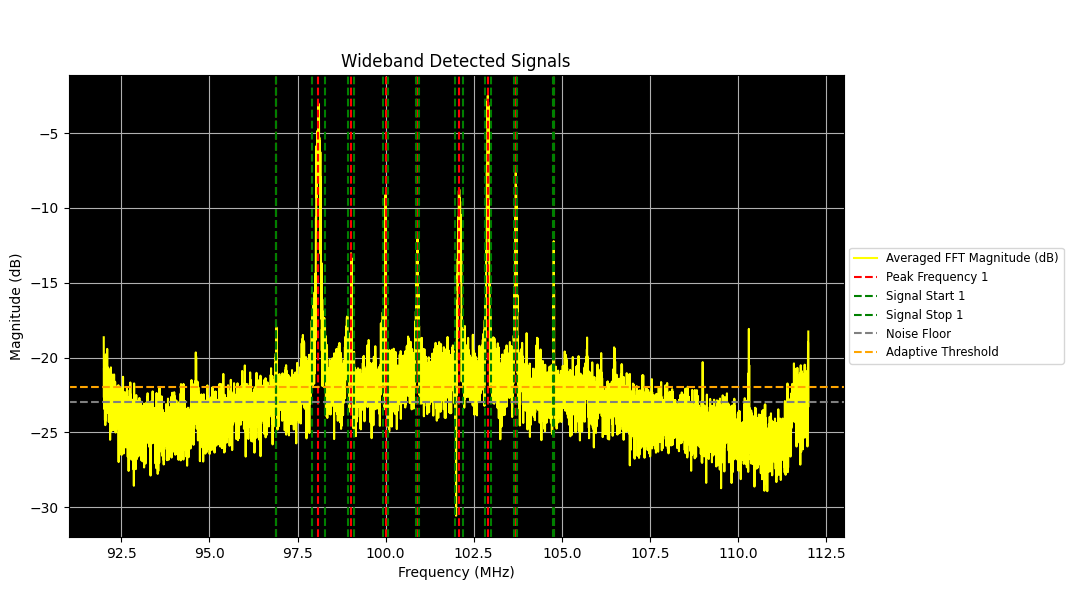

Peak Frequency (MHz) Bandwidth (MHz)     
96.902               0.000               
98.094               0.376               
99.019               0.149               
99.998               0.142               
100.906              0.100               
102.090              0.220               
102.901              0.161               
103.694              0.090               
104.771              0.020               


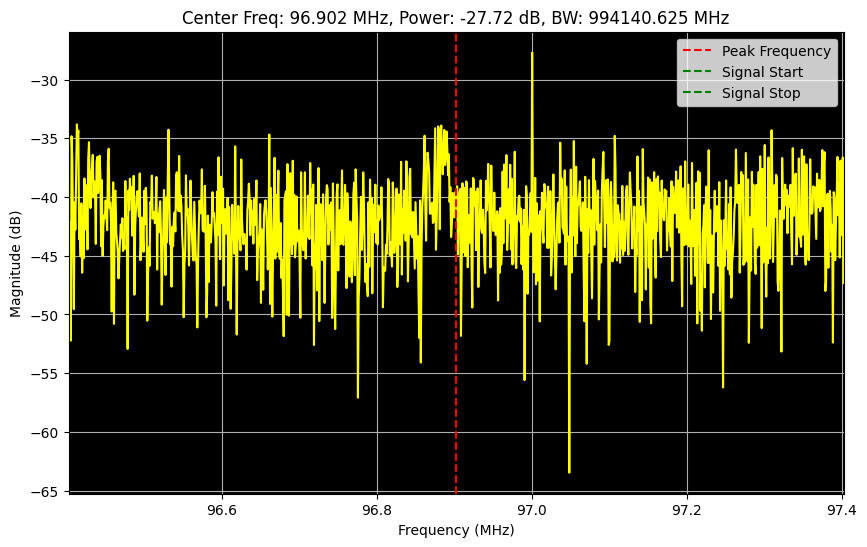

Refined Bandwidth: 994140.625 MHz


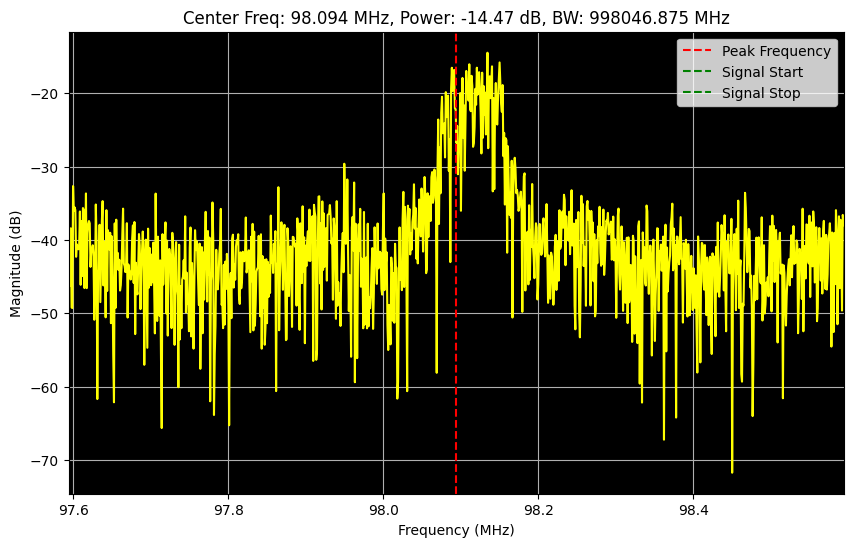

Refined Bandwidth: 998046.875 MHz


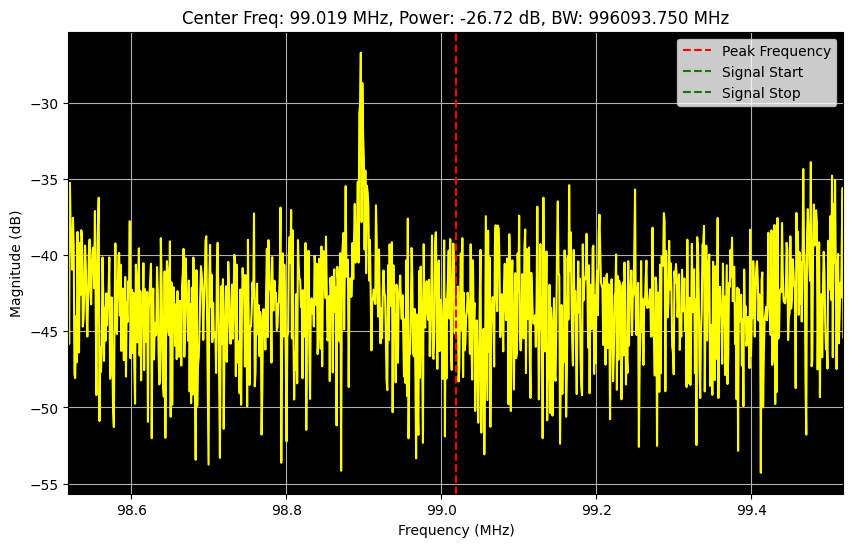

Refined Bandwidth: 996093.750 MHz


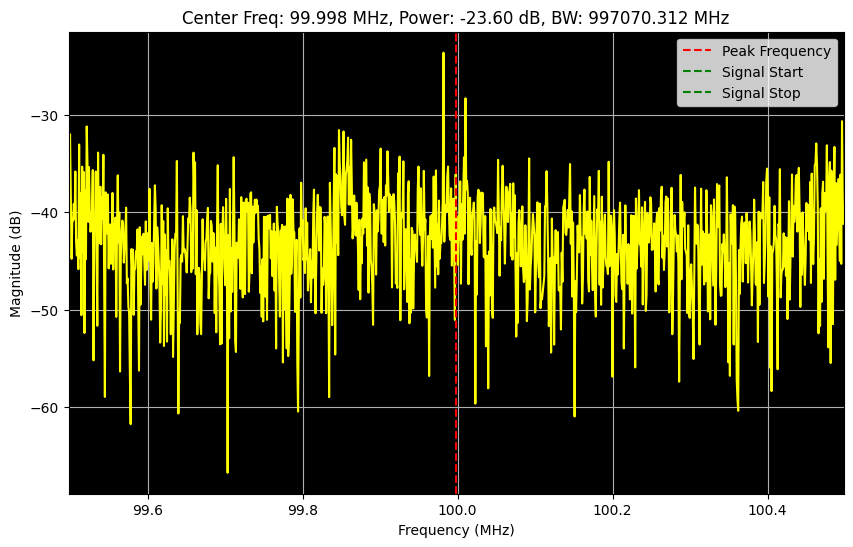

Refined Bandwidth: 997070.312 MHz


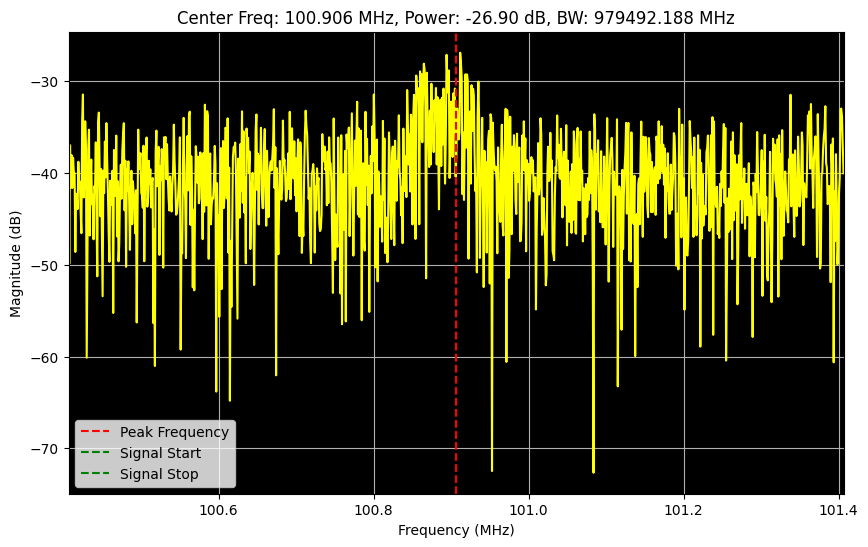

Refined Bandwidth: 979492.188 MHz


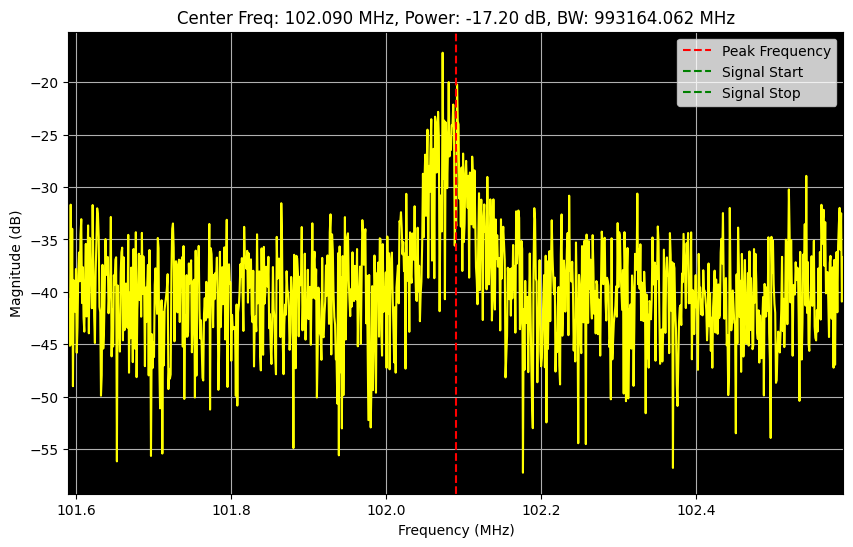

Refined Bandwidth: 993164.062 MHz


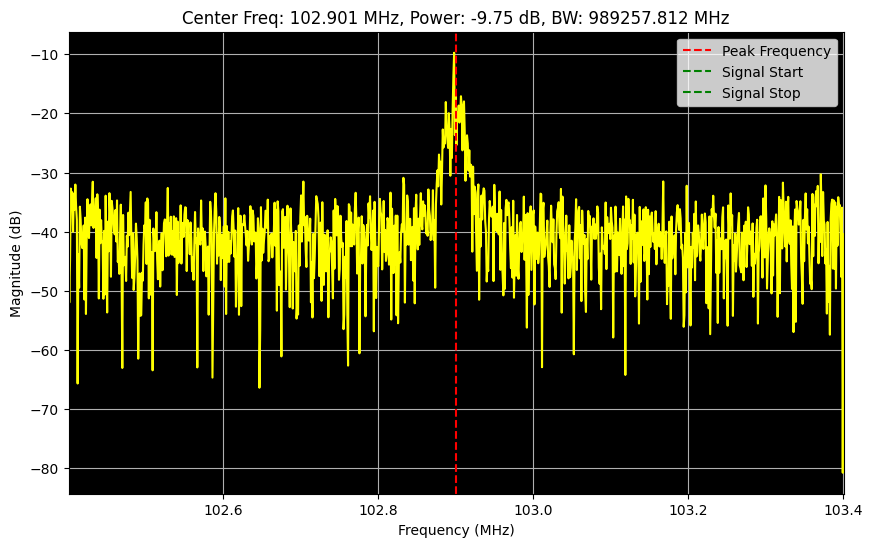

Refined Bandwidth: 989257.812 MHz


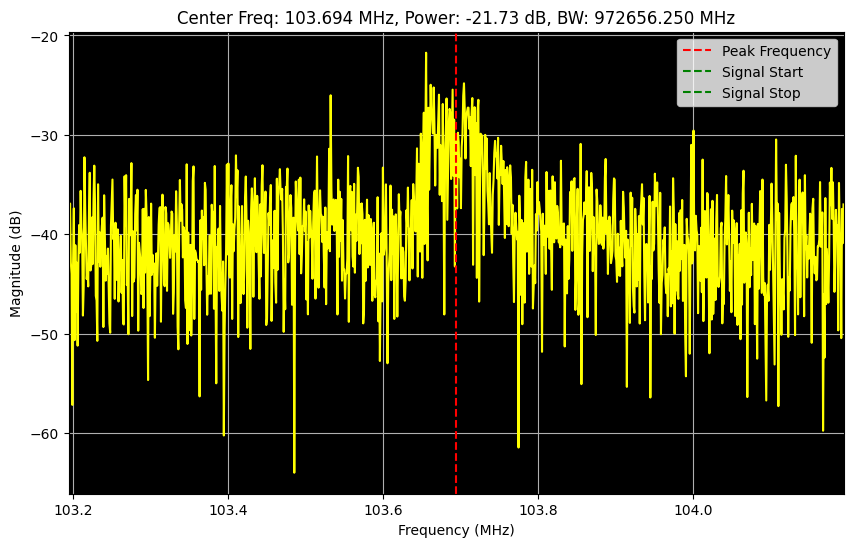

Refined Bandwidth: 972656.250 MHz


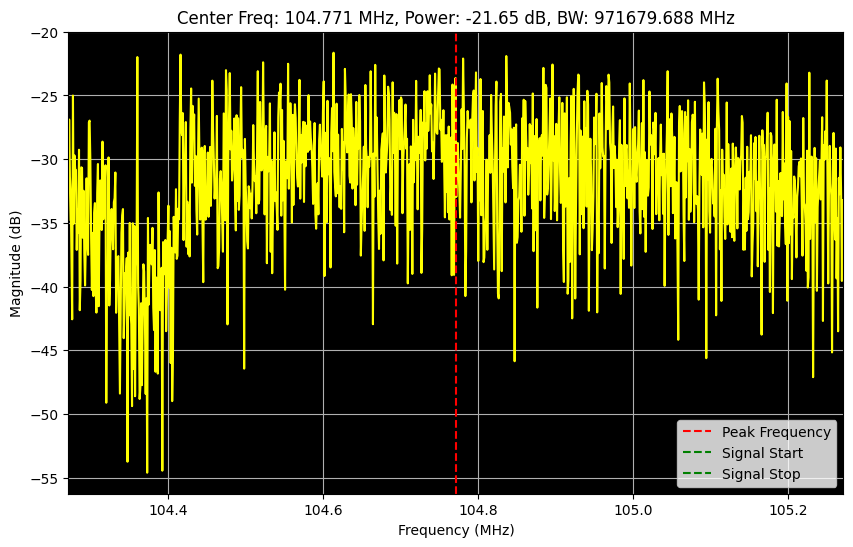

Refined Bandwidth: 971679.688 MHz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the wideband and refined data from the pickle file
input_filename = "iq_data.pkl"  # Update the filename if necessary

# Load the pickle file
with open(input_filename, 'rb') as f:
    data_list = []
    try:
        while True:
            data = pickle.load(f)
            data_list.append(data)
    except EOFError:
        pass

# Separate wideband and refined data
wideband_data = data_list[0]
refined_data_list = data_list[1:]

# Extract information from wideband data
center_freq = wideband_data['center_freq']
sample_rate = wideband_data['sample_rate']
fft_magnitude_db = wideband_data['fft_magnitude_db']
frequencies = wideband_data['frequencies']
signal_peaks = wideband_data['signal_peaks']
signal_bandwidths = wideband_data['signal_bandwidths']

# Plot the wideband FFT with detected peaks and bandwidths
plt.figure(figsize=(10, 6))
plt.plot(frequencies / 1e6, fft_magnitude_db, color='yellow', label="Averaged FFT Magnitude (dB)")

# Plot the detected peaks and bandwidths
for i, (peak_freq, bandwidth_mhz) in enumerate(zip(signal_peaks, signal_bandwidths)):
    plt.axvline(peak_freq, color='red', linestyle='--', label=f"Peak Frequency {i+1}" if i == 0 else None)
    plt.axvline(peak_freq - bandwidth_mhz / 2, color='green', linestyle='--', label=f"Signal Start {i+1}" if i == 0 else None)
    plt.axvline(peak_freq + bandwidth_mhz / 2, color='green', linestyle='--', label=f"Signal Stop {i+1}" if i == 0 else None)
    plt.text(peak_freq, np.max(fft_magnitude_db) + 5, f"BW: {bandwidth_mhz:.2f} MHz", color='white', ha='center')

plt.axhline(np.median(fft_magnitude_db), color='gray', linestyle='--', label="Noise Floor")
plt.axhline(np.median(fft_magnitude_db) + 1, color='orange', linestyle='--', label="Adaptive Threshold")
plt.title("Wideband Detected Signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.gca().set_facecolor('black')
plt.show()

# Print the detected peaks and bandwidths
print(f"{'Peak Frequency (MHz)':<20} {'Bandwidth (MHz)':<20}")
print("=" * 40)
for peak, bandwidth in zip(signal_peaks, signal_bandwidths):
    print(f"{peak:<20.3f} {bandwidth:<20.3f}")

# Process and plot each refined peak
for refined_data in refined_data_list:
    peak_freq = refined_data['peak_freq']
    refined_fft_magnitude_db = refined_data['refined_fft_magnitude_db']
    refined_frequencies = refined_data['refined_frequencies']
    refined_bandwidth_mhz = refined_data['refined_bandwidth_mhz']

    # Plotting the refined FFT with detected bandwidth, centered around the refined peak
    plt.figure(figsize=(10, 6))
    plt.plot(refined_frequencies / 1e6, refined_fft_magnitude_db, color='yellow')
    plt.axvline(peak_freq, color='red', linestyle='--', label="Peak Frequency")
    plt.axvline((peak_freq - refined_bandwidth_mhz * 1e6 / 2) / 1e6, color='green', linestyle='--', label="Signal Start")
    plt.axvline((peak_freq + refined_bandwidth_mhz * 1e6 / 2) / 1e6, color='green', linestyle='--', label="Signal Stop")
    plt.title(f"Center Freq: {peak_freq:.3f} MHz, Power: {np.max(refined_fft_magnitude_db):.2f} dB, BW: {refined_bandwidth_mhz:.3f} MHz")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)
    plt.legend()
    plt.gca().set_facecolor('black')
    plt.xlim(peak_freq - 0.5, peak_freq + 0.5)  # Center the plot around the refined peak
    plt.show()

    print(f"Refined Bandwidth: {refined_bandwidth_mhz:.3f} MHz")
